In [22]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import numpy as np
import pandas as pd
from nltk import SnowballStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import urllib #For webscraping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


# set plot style
sns.set()

In [2]:
df = pd.read_csv('train_set.csv') # load the data

In [3]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
#Replaced URL
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['text'] = df['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [5]:
#Lowered String
df['text'] = df['text'].str.lower()

In [6]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
#Create function to remove Punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [8]:
#Removed Punctuation
df['text'] = df['text'].apply(remove_punctuation)
df['text'].iloc[0]

'umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [9]:
weird_chars = ['tÃƒÂ¢Ã¢â€šÂ¬Ã‚Â¦ï¿½ï¿½ï¿½ï¿½ï™']
normal_chars = 'abcdefghijklmnopqrstuvwxyz123456789 \n'

In [10]:
#Create function to remove weird characters
def remove_weird_chars(post):
    return ''.join([l for l in post if l in normal_chars])

In [11]:
#Remove weird characters
df['text'] = df['text'].apply(remove_weird_chars)
df['text'].iloc[0]

'umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'

In [12]:
#Split x and y features
y = df["lang_id"]
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(df['text'])

In [13]:
X.shape

(33000, 216)

In [14]:
from sklearn.model_selection import train_test_split
n = 20000
X_train, X_test, y_train, y_test = train_test_split(X[:n].toarray(), y[:n])

In [15]:
X_train

array([[0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_train.shape

(15000, 216)

In [54]:
names = [ 'Nearest Neighbors',           
         'Decision Tree', 'Random Forest', 'Naive Bayes']

In [32]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    MultinomialNB()
]

### Evaluated four models to determine best model to use:


In [33]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='micro')
    recall    = metrics.recall_score(y_train, y_pred,average='micro')
    
    f1        = metrics.f1_score(y_train, y_pred, average='micro')    
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='micro')    
    
    # Save the results to dictionaries
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring


C:\Users\gabem\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gabem\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gabem\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting Random Forest model...
... predicting
... scoring
Fitting Nayve Bayes model...
... predicting
... scoring
... All done!


In [34]:
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Nayve Bayes,0.910533,0.910533,0.910533,0.910533,0.8974,0.526971
Nearest Neighbors,0.904200,0.904200,0.904200,0.904200,0.8530,0.013903
Random Forest,0.618267,0.618267,0.618267,0.618267,0.6038,0.102782
Decision Tree,0.533267,0.533267,0.533267,0.533267,0.5206,0.377784


<AxesSubplot:xlabel='Classifier'>

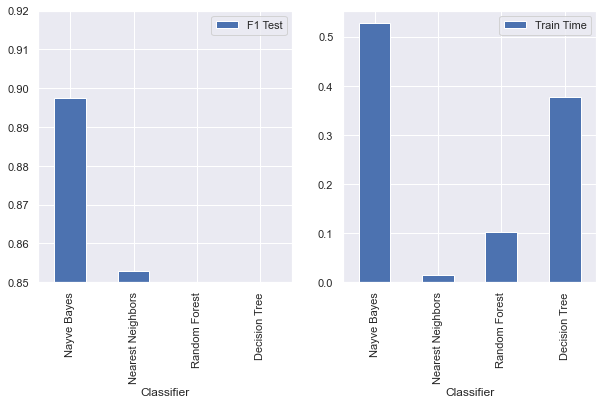

In [35]:
#Plot F1 score and training time
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### Validate Model using cross validation:

In [36]:

cv = []
for name, model in models.items():
    print ()
    print(name)
    scores = cross_val_score(model, X=X[:n].toarray(), y=y[:n], cv=10)
    print("Accuracy: {:0.2f} (+/- {:0.4f})".format(scores.mean(), scores.std()))
    cv.append([name, scores.mean(), scores.std() ])
    
cv = pd.DataFrame(cv, columns=['Model', 'CV_Mean', 'CV_Std_Dev'])
cv.set_index('Model', inplace=True)


Nearest Neighbors
Accuracy: 0.86 (+/- 0.0051)

Decision Tree
Accuracy: 0.53 (+/- 0.0068)

Random Forest
Accuracy: 0.58 (+/- 0.0161)

Nayve Bayes
Accuracy: 0.84 (+/- 0.0036)


### Based on results decided to use Naive Bayes Next used grid search to determine best alpha parameter:

In [51]:
alpha = [ 1, 2, 3, 4, 5,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = {'alpha': alpha}

In [52]:
grid_knn = GridSearchCV(MultinomialNB(), param_grid)

In [53]:
grid_knn.fit(X_train, y_train)
grid_knn.best_params_

{'alpha': 0.1}

### Best alpha value is 0.1

## Submission to Kaggle:

In [71]:
X = df["text"]
y = df["lang_id"]

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [73]:
df_test = pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [74]:
df_test['text'] = df_test['text'].str.lower()

In [75]:
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [76]:
df_test['text'] = df_test['text'].apply(remove_weird_chars)
df_test['text'].iloc[0]

'mmasepala fa maemo a a kgethegileng a letlelela kgato eo'

In [77]:
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [78]:
X_Kaggle = df_test['text']

In [79]:
X_Kaggle.shape

(5682,)

In [80]:
model = MultinomialNB()

In [81]:
model.fit(vect.transform(X_train), y_train)

MultinomialNB()

In [82]:
kaggle_pred = model.predict(vect.transform(X_Kaggle))

In [83]:
kaggle_pred.shape

(5682,)

In [84]:
pred_df = pd.DataFrame(data=df_test['index'], columns=['index'])
pred_df.insert(1, 'lang_id', kaggle_pred, allow_duplicates=False)

pred_df.head()

,index,lang_id
0,1,tsn
1,2,tso
2,3,ven
3,4,ssw
4,5,afr


In [46]:
pred_df.to_csv(path_or_buf='Theo_pred.csv', index=False)